In [140]:
import pandas as pd
import requests
import html5lib
from bs4 import BeautifulSoup

# Scraping Data

In [141]:
page= requests.get('https://www.goodcarbadcar.net/daimler-ag-us-sales-figures/')
soup=BeautifulSoup(page.content, 'html.parser')

In [142]:
print(soup)

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="#7dbef4" name="theme-color"/>
<title>Daimler AG Group Sales Figures - US Market | GCBC</title>
<script>
window.adthrive = window.adthrive || {};
window.adthrive.cmd = window.adthrive.cmd || [];
window.adthrive.host = 'ads.adthrive.com';
window.adthrive.plugin = 'adthrive-ads-1.0.37';
window.adthrive.threshold = Math.floor(Math.random() * 100 + 1);
(function() {
var script = document.createElement('script');
script.async = true;
script.type = 'text/javascript';
script.src = 'https://ads.adthrive.com/sites/5d9d1ce1963c1233c88539e9/ads.min.js?threshold=' + window.adthrive.threshold;
var node = document.getElementsByTagName('script')[0];
node.parentNode.insertBefore(script, node);
})();
</script>
<!-- All In One SEO Pack 3.5.2ob_start_detected [-1,-1] -->
<meta content="This is your hub 

In [143]:
year_2005=soup.find(id='table_1803_row_0')

In [144]:
year_2005

<tr id="table_1803_row_0">
<td style="">2005</td>
<td style="">12,844</td>
<td style="">14,409</td>
<td style="">19,546</td>
<td style="">20,390</td>
<td style="">19,613</td>
<td style="">19,728</td>
<td style="">22,731</td>
<td style="">21,807</td>
<td style="">19,597</td>
<td style="">20,204</td>
<td style="">19,820</td>
<td style="">33,042</td>
</tr>

In [145]:
stat_table=soup.find_all('table', id='table_1')

In [146]:
#if just one table, its the table we looked for
len(stat_table)

1

In [147]:
type(stat_table)

bs4.element.ResultSet

In [148]:
stat_table=stat_table[0]

In [149]:
type(stat_table)

bs4.element.Tag

In [150]:
#pull out each rowm then pull out each cell

In [151]:
#pull out all rows
for row in stat_table.find_all('tr'):
    for cell in row.find_all('td'):
        print(cell.text)

2005
12,844
14,409
19,546
20,390
19,613
19,728
22,731
21,807
19,597
20,204
19,820
33,042
2006
13,840
18,765
23,488
22,928
23,645
22,680
23,483
22,881
22,173
22,899
23,678
29,435
2007
17,828
17,840
22,497
22,112
23,131
21,224
19,955
22,895
23,957
25,295
24,103
28,926
2008
19,680
19,701
22,090
24,274
26,264
23,620
24,403
21,916
21,401
17,166
17,236
22,000
2009
12,699
15,999
17,790
16,204
16,514
16,883
18,358
19,889
18,603
19,307
18,412
21,244
2010
15,444
15,835
20,708
18,916
19,879
19,582
18,616
20,130
21,097
19,454
19,256
22,039
2011
17,631
16,660
22,971
19,624
20,798
23,132
21,065
20,728
23,897
24,449
28,255
28,006
2012
21,726
39,358
25,508
25,066
24,359
25,388
22,294
23,439
25,980
26,642
32,829
31,372
2013
24,239
24,051
27,104
26,157
27,359
27,162
26,423
27,144
27,474
32,620
37,345
36,690
2014
24,413
24,971
30,091
29,329
29,570
29,380
30,757
30,291
30,271
32,622
37,925
38,270
2015
26,616
25,749
32,883
32,432
33,189
31,260
30,130
28,571
30,428
31,766
33,108
38,588
2016
26,814
25,150
32

In [85]:
with open('benz_text_.csv', 'w') as r:
    for row in stat_table.find_all('tr'):
        for cell in row.find_all('td'):
           
            r.write(cell.text.ljust(20))
        r.write('\n') #newline
       

# Load and modify Data

In [302]:
df=pd.read_csv('benz_text-Original -Modified.csv', delimiter=';')

In [303]:
df

,Month,Sales
0,2005-01,"12,844"
1,2005-02,"14,409"
2,2005-03,"19,546"
3,2005-04,"20,390"
4,2005-05,"19,613"
...,...,...
178,2019-11,"35,954"
179,2019-12,"35,279"
180,2020-01,"24,445"
181,2020-02,"31,650"


In [304]:
#remove commas
df['Sales']=df['Sales'].apply(lambda x: x.replace(',', ''))

In [305]:
df

,Month,Sales
0,2005-01,12844
1,2005-02,14409
2,2005-03,19546
3,2005-04,20390
4,2005-05,19613
...,...,...
178,2019-11,35954
179,2019-12,35279
180,2020-01,24445
181,2020-02,31650


In [306]:
type(df.Sales)

pandas.core.series.Series

In [307]:
#convert Sales data to numeric, so we can plot it
df.Sales=pd.to_numeric(df.Sales)

In [308]:
#convert month into datetime
df['Month']=pd.to_datetime(df['Month'])

In [309]:
df.head()

,Month,Sales
0,2005-01-01,12844
1,2005-02-01,14409
2,2005-03-01,19546
3,2005-04-01,20390
4,2005-05-01,19613


In [310]:
#set month column to index
df.set_index('Month', inplace=True)

In [311]:
df.head()

,Sales
Month,
2005-01-01,12844
2005-02-01,14409
2005-03-01,19546
2005-04-01,20390
2005-05-01,19613


# Data Visualization

In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

Text(0.5, 1.0, 'Daimler Car Sales in the U.S. market')

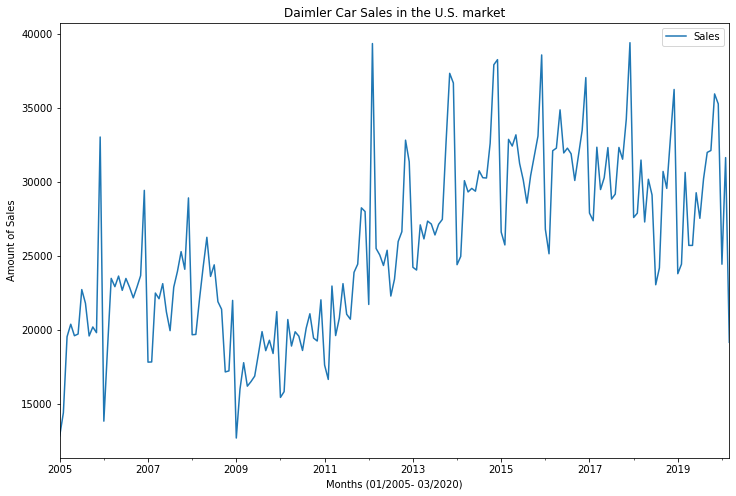

In [313]:
df.plot(figsize=(12,8))
plt.xlabel('Months (01/2005- 03/2020)')
plt.ylabel('Amount of Sales')
plt.title('Daimler Car Sales in the U.S. market')

In [314]:
#Check for Stationarity
#H0 : It is non stationary
#H1 : It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    #zip: combining zip and labels values
    labels=['ADF Test Statistic', 'p-value', 'No. of Lags Used', 'No. of observations used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
        #if the result is equal or lower than 0.05, the null hypothesis is rejected
    if result[1]<=0.05:
        print('Reject the Null Hypothesis. Data is Stationary')
    else:
        print('Accept the Null Hypothesis. Data is Non-Stationary')

In [315]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.2711228694381578
p-value : 0.6422779389054316
No. of Lags Used : 14
No. of observations used : 168
Accept the Null Hypothesis. Data is Non-Stationary


In [316]:
df['Stationary']=df.Sales.diff(12)

In [317]:
df.head(15)

,Sales,Stationary
Month,,
2005-01-01,12844,NaN
2005-02-01,14409,NaN
2005-03-01,19546,NaN
2005-04-01,20390,NaN
2005-05-01,19613,NaN
2005-06-01,19728,NaN
2005-07-01,22731,NaN
2005-08-01,21807,NaN
2005-09-01,19597,NaN


In [318]:
adfuller_test(df['Stationary'].dropna())

ADF Test Statistic : -2.9280728026009677
p-value : 0.042179550974212
No. of Lags Used : 12
No. of observations used : 158
Reject the Null Hypothesis. Data is Stationary


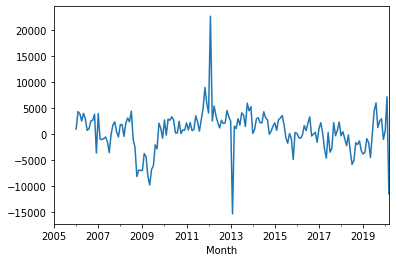

In [319]:
df['Stationary'].plot()
#now data looks stationary

In [320]:
#auto correlation
#partial auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

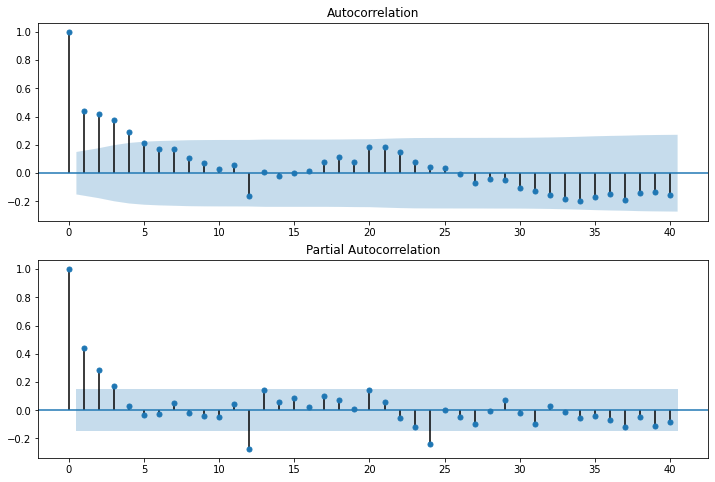

In [322]:
fig=plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
#first 12 values are NaN values
fig=sm.graphics.tsa.plot_acf(df['Stationary'].iloc[13:], lags=40, ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Stationary'].iloc[13:], lags=40, ax=ax2)

In [323]:
# ARIMA is for non-seasonal data, if we train model on non seasonal data,
#result will be non valuable (see graph)
#p=1, d=1, q= 0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [324]:
#
model=ARIMA(df['Sales'], order=(1,1,1)) #order= p,d,q
model_fit=model.fit()

C:\Users\aschlee\AppData\Local\Continuum\anaconda3-1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\aschlee\AppData\Local\Continuum\anaconda3-1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


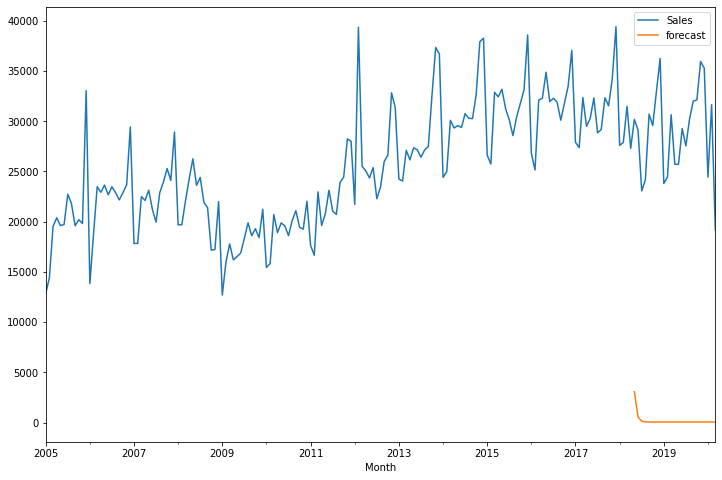

In [325]:
df['forecast']=model_fit.predict(start=160, end=184, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(12,8))
#bullshit solution in plotting because model was trained on seasonal data
#ARIMA is good for non- seasonal data

In [326]:
#solution= SARIMAX(Seasonal ARIMAX ) 
#order= p,d,q
#seasonal_order= p,d,q + how many numbers are you shifting in season?
model=sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\aschlee\AppData\Local\Continuum\anaconda3-1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


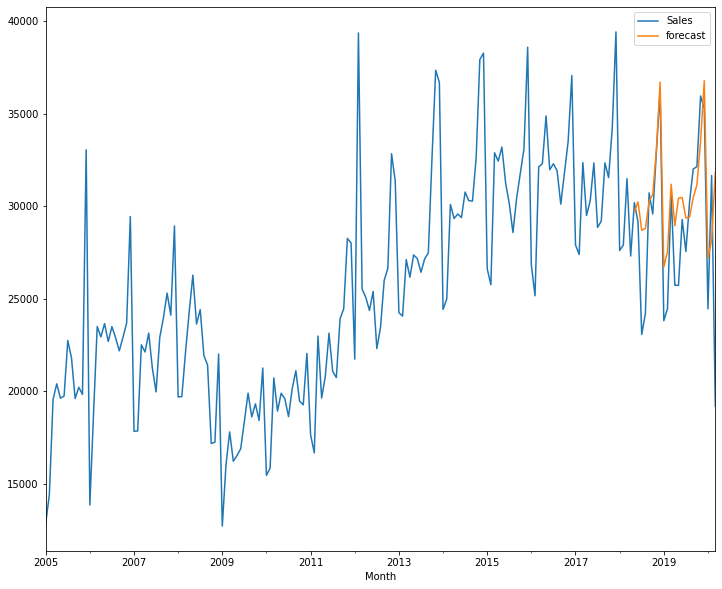

In [338]:
df['forecast']=results.predict(start=160, end=184, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(12,10))

In [347]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0,28)]

In [348]:
future_dataset_df=pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [349]:
future_dataset_df.tail()

,Sales,Stationary,forecast
2022-02-01,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN


In [362]:
#concat / merge df with dataset
future_df=pd.concat([df,future_dataset_df])

C:\Users\aschlee\AppData\Local\Continuum\anaconda3-1\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


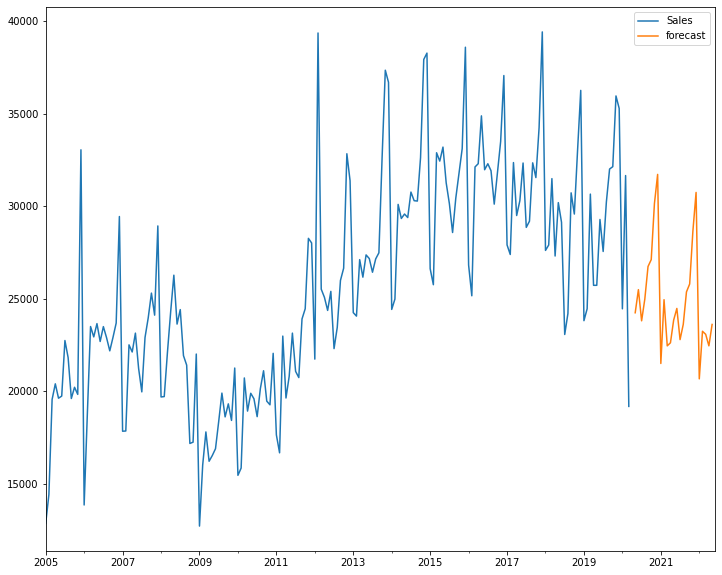

In [369]:
future_df['forecast']= results.predict(start=184, end=208, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12,10))